In [ ]:
!pip install 'numpy<2' pmdarima
!pip install "numpy<2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 49.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have nump

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
^C


In [ ]:
!pip install yfinance pandas scikit-learn matplotlib


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
import yfinance as yf
import pandas as pd


#Download NVDA daily stock data for the past 5 years
ticker = 'NVDA'
data = yf.download(ticker, period="2y", interval="1d")  # 1 year of daily data

#View the first few rows of the data to understand its structure
print(data.head())
print(data.shape)






[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2023-11-27  48.213585  48.501413  47.623932  47.771844  395662000
2023-11-28  47.792831  48.294538  47.445037  48.207588  401491000
2023-11-29  48.111649  48.733284  47.831815  48.350510  382005000
2023-11-30  46.742455  48.081665  46.394660  47.995714  526247000
2023-12-01  46.737453  47.172199  46.159795  46.497597  369317000
(503, 5)


In [ ]:
df = pd.DataFrame(data)
display(df.head(5))

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2023-11-27,48.213585,48.501413,47.623932,47.771844,395662000
2023-11-28,47.792831,48.294538,47.445037,48.207588,401491000
2023-11-29,48.111649,48.733284,47.831815,48.350510,382005000
2023-11-30,46.742455,48.081665,46.394660,47.995714,526247000
2023-12-01,46.737453,47.172199,46.159795,46.497597,369317000


In [ ]:
#what our data means -
#Open: Opening stock price of the day
#Close: Closing stock price of the day
#High: Highest stock price of the data
#Low: Lowest stock price of the day
data.describe()



Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,124.449771,126.555598,122.108191,124.496061,3.093552e+08
std,38.730941,39.171172,38.346106,38.891270,1.521018e+08
min,45.480190,46.049856,44.983483,45.443209,1.051570e+08
25%,97.262760,100.927297,94.254183,98.762570,1.930086e+08
50%,125.563255,128.282244,122.554370,124.954167,2.653774e+08
75%,145.010117,146.478045,141.972066,144.728486,3.930178e+08
max,207.039993,212.190002,205.559998,208.080002,1.142269e+09


In [ ]:
#check for missing values
data.isna().sum()

,,0
Price,Ticker,
Close,NVDA,0
High,NVDA,0
Low,NVDA,0
Open,NVDA,0
Volume,NVDA,0


In [ ]:
# Extract the 'Close' price as the target variable
target = data['Close']

# Drop the 'Close' column from the original DataFrame
data = data.drop('Close', axis=1)

# Display the first few values of the target variable
print("\nTarget variable (Close Price):")
print(target.head())





Target variable (Close Price):
Ticker           NVDA
Date                 
2023-11-27  48.213585
2023-11-28  47.792831
2023-11-29  48.111649
2023-11-30  46.742455
2023-12-01  46.737453


In [ ]:
# Display the first few rows of the modified DataFrame
print("\nModified DataFrame (data) after dropping 'Close':")
print(data.tail())


Modified DataFrame (data) after dropping 'Close':
Price             High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA       NVDA
Date                                                     
2025-11-20  196.000000  179.850006  195.949997  343504800
2025-11-21  184.559998  172.929993  181.240005  346926200
2025-11-24  183.500000  176.479996  179.490005  256618300
2025-11-25  178.160004  169.550003  174.910004  320600300
2025-11-26  182.910004  178.240005  181.630005  183852000


In [ ]:
data.to_csv('NVDA_stock_price.csv')
data.head(5)

Price,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA
Date,,,,
2023-11-27,48.501413,47.623932,47.771844,395662000
2023-11-28,48.294538,47.445037,48.207588,401491000
2023-11-29,48.733284,47.831815,48.350510,382005000
2023-11-30,48.081665,46.394660,47.995714,526247000
2023-12-01,47.172199,46.159795,46.497597,369317000


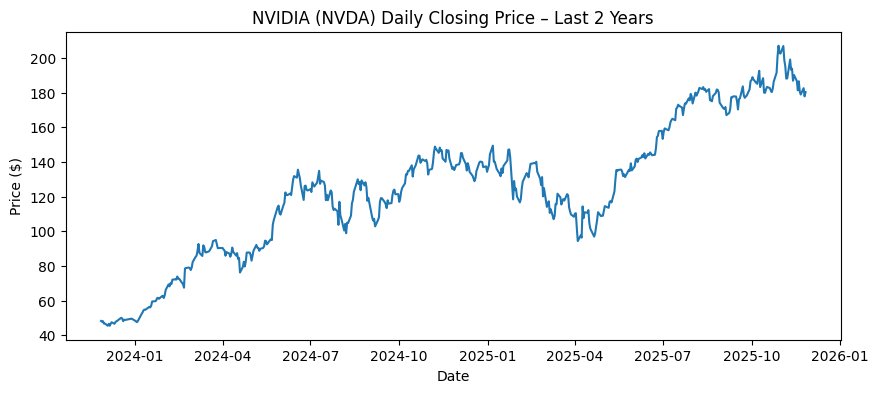

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(target)
plt.title("NVIDIA (NVDA) Daily Closing Price – Last 2 Years")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()


In [ ]:
#Checking for stationarity in the target data via the Augmented Dickey-Fuller unit root test.
from statsmodels.tsa.stattools import adfuller

result = adfuller(target)
print('ADF Statistic: ', result[0])
print('p-value:', result[1])


ADF Statistic:  -1.5144190715439705
p-value: 0.5263667547120944


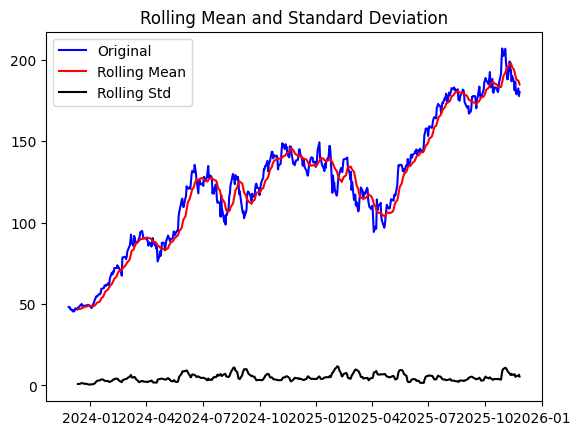

Results of dickey fuller test
Test Statistics                 -1.514419
p-value                          0.526367
No. of lags used                 4.000000
Number of observations used    498.000000
critical value (1%)             -3.443549
critical value (5%)             -2.867361
critical value (10%)            -2.569870
dtype: float64


In [ ]:
#visualiziing stationarity too
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df['Close'])

In [ ]:
#P value is greater than 0.05 so there is no stationarity

target_diff = target.diff().dropna()
target_diff


Ticker,NVDA
Date,
2023-11-28,-0.420753
2023-11-29,0.318817
2023-11-30,-1.369194
2023-12-01,-0.005001
2023-12-04,-1.254265
...,...
2025-11-20,-5.880005
2025-11-21,-1.759995
2025-11-24,3.669998


<Axes: ylabel='Density'>

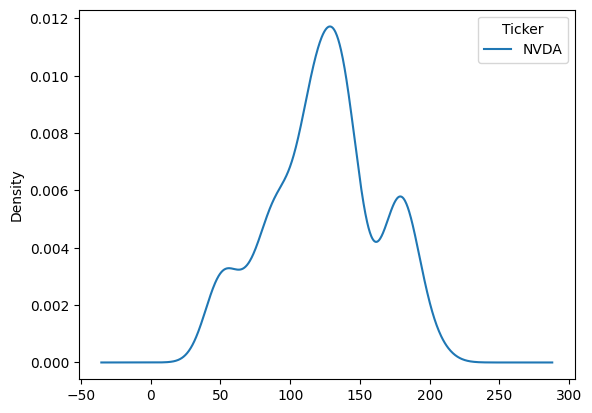

In [ ]:
#Probability Distribution of the dataset
#Kernel Density Estimate (KDE) plot
df_close = df['Close']
df_close.plot(kind='kde')

In [ ]:
# FIX: Remove MultiIndex if it exists
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.droplevel(1)

# Extract close prices
df_close = df['Close']

# FIX: Ensure it's a Series, not DataFrame
if isinstance(df_close, pd.DataFrame):
    df_close = df_close.squeeze()

In [ ]:
# CRITICAL: Verify train_data is clean
print(f"\nTrain data shape: {train_data.shape}")
print(f"Train data type: {type(train_data)}")
print(f"Train data range: {train_data.min():.4f} to {train_data.max():.4f}")
print(f"Expected log range: ~{np.log(50):.2f} to ~{np.log(200):.2f}")

NameError: name 'train_data' is not defined

<Figure size 640x480 with 0 Axes>

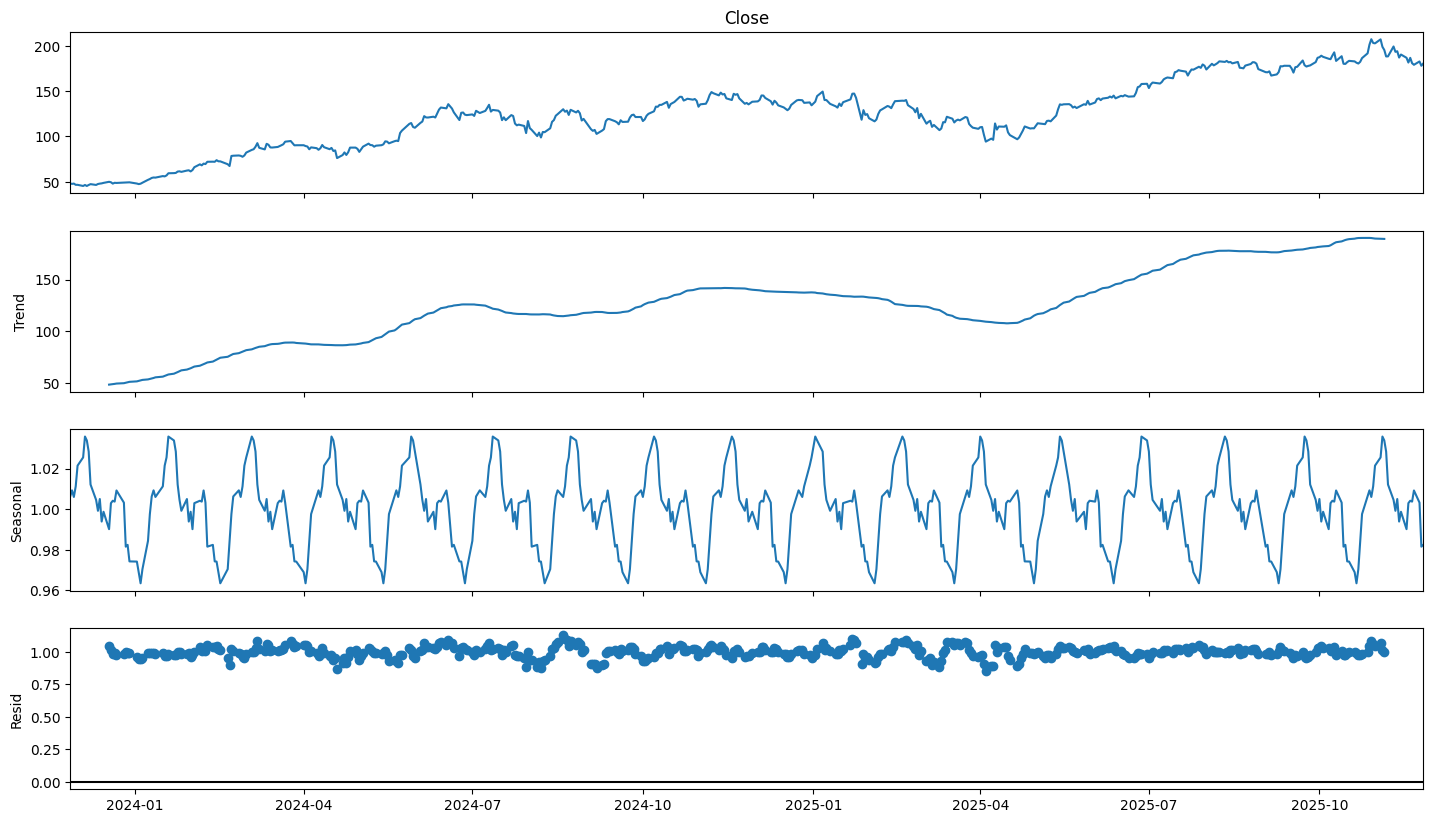

In [ ]:
#10To separate the trend and the seasonality from a time series,
# we can decompose the series using the following code.
decomposition = seasonal_decompose(df['Close'], model='additive', period=30)
result = seasonal_decompose(df['Close'], model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

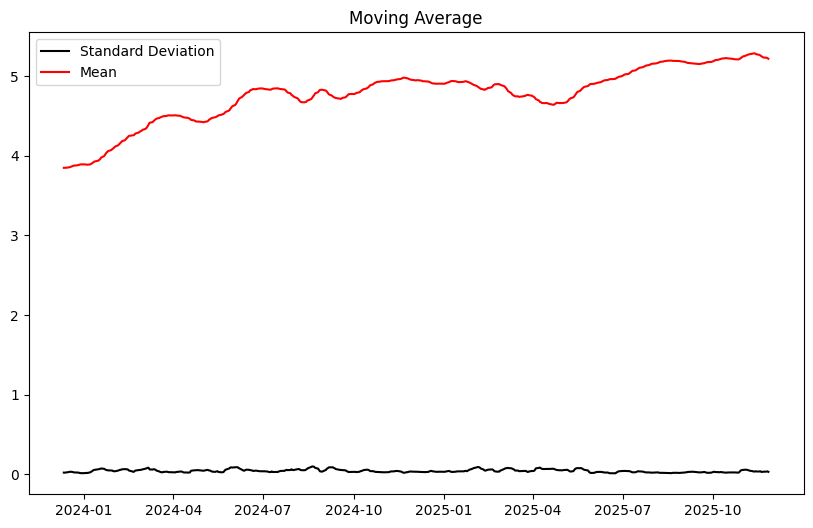

In [ ]:
#taking log transformation of closing price
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

### Developing an ARIMA model to predict closing stock price

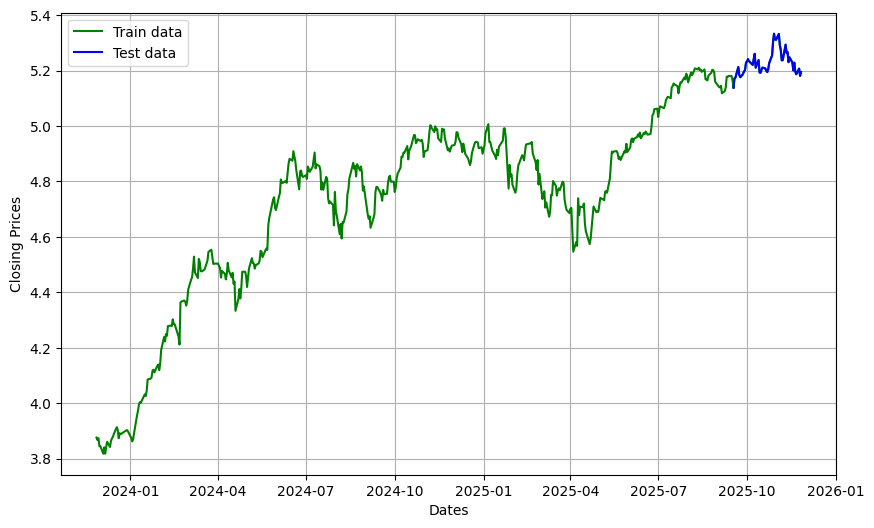

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 89.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contr

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1785.697, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1788.641, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1787.935, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1784.107, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1789.952, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1790.270, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1789.451, Time=1.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1788.811, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-1788.084, Time=0.12 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 2.411 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  449
Model:               SARIMAX(3, 1, 0)   Log Likelihood                 900.135
Date:                Fri, 28 Nov 2025   

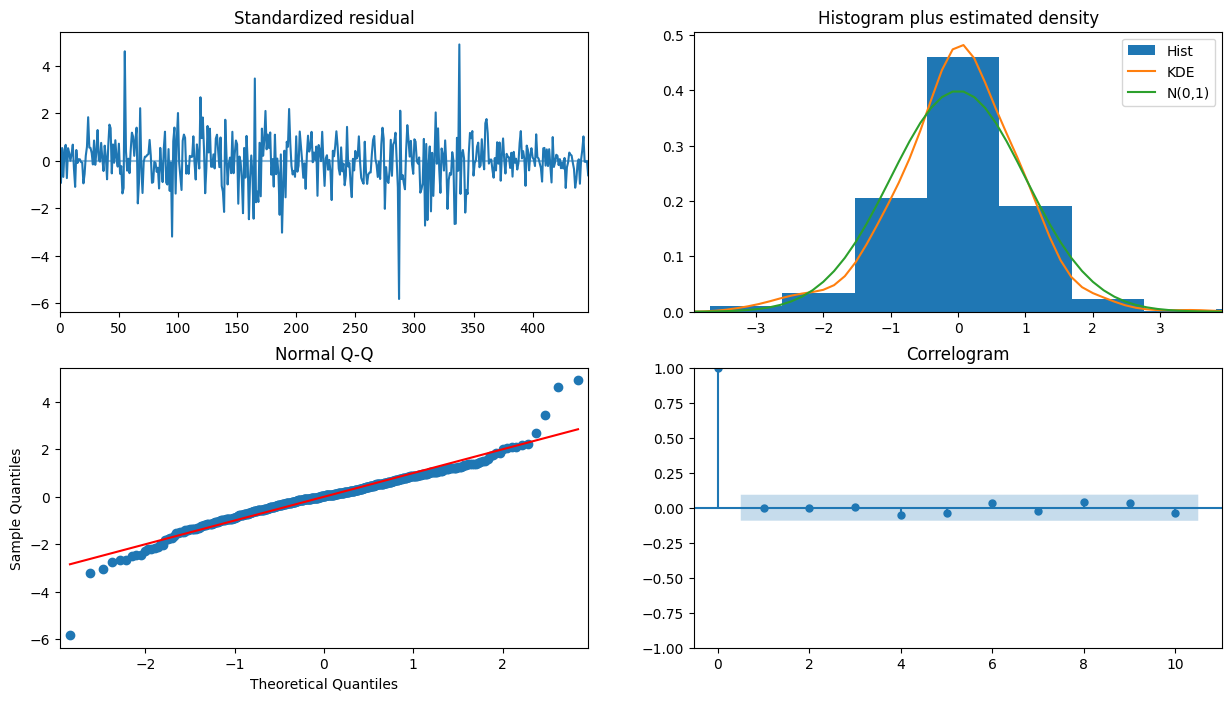

In [ ]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
#Top left: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

#Top Right: The density plot on the top right suggests a normal distribution with a mean of zero.

#Bottom left: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.
#Bottom Right: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

In [ ]:
#As a result, the Auto ARIMA model assigned the values 1, 1, and 0 to, p, d, and q, respectively.

#Modeling
# Build Model
model = ARIMA(train_data, order=(3,1,0))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  449
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 898.042
Date:                Fri, 28 Nov 2025   AIC                          -1788.084
Time:                        02:56:40   BIC                          -1771.665
Sample:                             0   HQIC                         -1781.612
                                - 449                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0805      0.038     -2.091      0.037      -0.156      -0.005
ar.L2          0.0895      0.045      1.981      0.048       0.001       0.178
ar.L3         -0.0628      0.048     -1.318      0.1

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



NUMERICAL STOCK PRICE FORECAST (Test Period)
            Actual_Price  Predicted_Price  Lower_Bound_95%  Upper_Bound_95%  \
Date                                                                          
2025-09-17        170.29           175.64           164.82           187.17   
2025-09-18        176.24           175.91           161.41           191.71   
2025-09-19        176.67           176.71           158.80           196.65   
2025-09-22        183.61           177.17           156.88           200.08   
2025-09-23        178.43           177.74           155.25           203.49   
2025-09-24        176.97           178.23           153.81           206.52   
2025-09-25        177.69           178.77           152.54           209.51   
2025-09-26        178.19           179.29           151.38           212.34   
2025-09-29        181.85           179.82           150.33           215.09   
2025-09-30        186.58           180.34           149.36           217.76   
2025-1

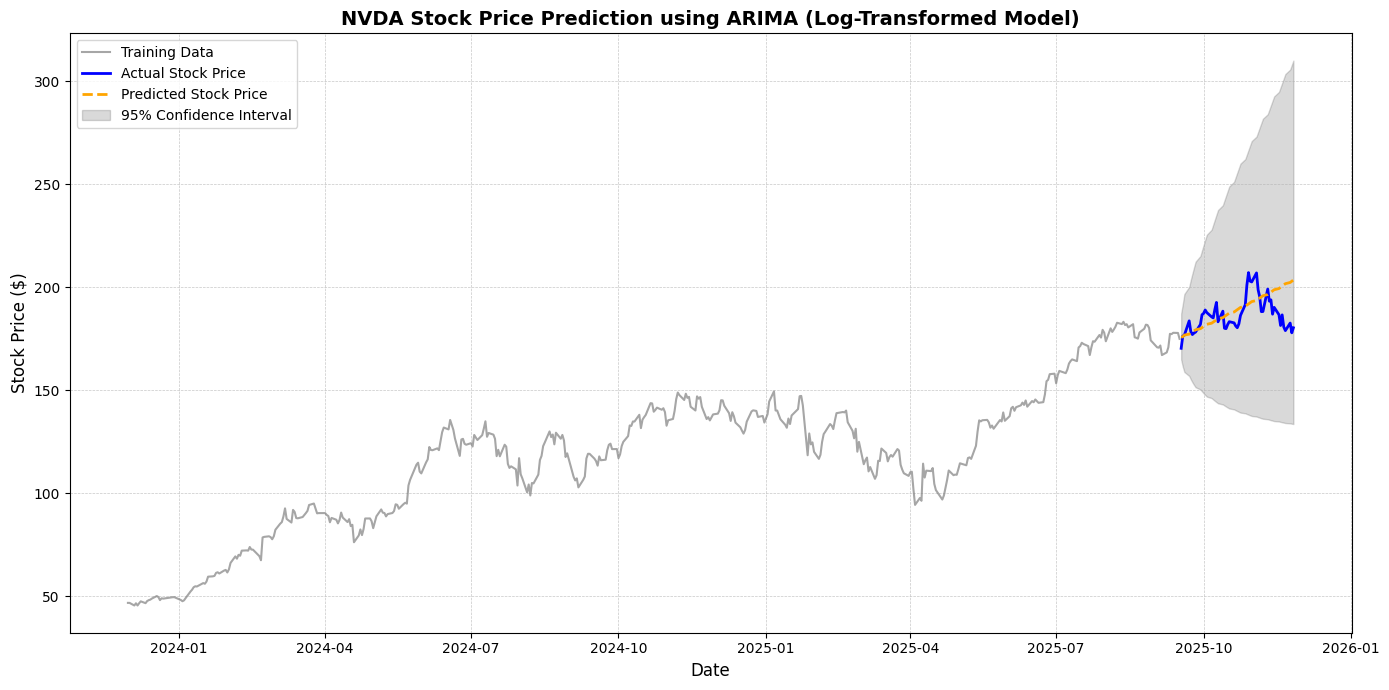

In [ ]:
# --- Forecasting ---
# 1. Determine the number of steps to forecast. This should match the length of your test set.
n_periods = len(test_data)

# 2. Use the predict method and set return_conf_int=True
# This returns forecast values (fc) and confidence intervals (conf_int) IN LOG SPACE
fc, conf_int = model_autoARIMA.predict(n_periods=n_periods, return_conf_int=True)

# 3. Convert results to Pandas Series with the correct index (test_data's index)
# ROBUST FIX: Use .values.ravel() to ensure fc is a 1D NumPy array
fc_series_log = pd.Series(fc.values.ravel() if hasattr(fc, 'values') else fc, index=test_data.index)
lower_series_log = pd.Series(conf_int[:, 0], index=test_data.index)
upper_series_log = pd.Series(conf_int[:, 1], index=test_data.index)

#CRITICAL: Convert from LOG to ACTUAL PRICES
fc_series = np.exp(fc_series_log)
lower_series = np.exp(lower_series_log)
upper_series = np.exp(upper_series_log)

# Also convert test_data and train_data back to actual prices for plotting
test_data_actual = np.exp(test_data)
train_data_actual = np.exp(train_data)

# --- Display Numerical Results ---
forecast_df = pd.DataFrame({
    'Actual_Price': test_data_actual.round(2),
    'Predicted_Price': fc_series.round(2),
    'Lower_Bound_95%': lower_series.round(2),
    'Upper_Bound_95%': upper_series.round(2),
    'Error': (test_data_actual - fc_series).round(2),
    'Error_%': ((test_data_actual - fc_series) / test_data_actual * 100).round(2)
})

print("\n" + "="*70)
print("NUMERICAL STOCK PRICE FORECAST (Test Period)")
print("="*70)
print(forecast_df.head(20))  # Show first 20 predictions
print("\n" + "="*70 + "\n")

# Calculate accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

mae = mean_absolute_error(test_data_actual, fc_series)
rmse = np.sqrt(mean_squared_error(test_data_actual, fc_series))
mape = mean_absolute_percentage_error(test_data_actual, fc_series) * 100

print("MODEL PERFORMANCE METRICS:")
print(f"MAE (Mean Absolute Error): ${mae:.2f}")
print(f"RMSE (Root Mean Squared Error): ${rmse:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
print("\n" + "="*70 + "\n")

# --- Plotting ---
plt.figure(figsize=(14, 7), dpi=100)

# Plot training data (historical data) - ACTUAL PRICES
plt.plot(train_data_actual, label='Training Data', color='gray', alpha=0.7, linewidth=1.5)

# Plot actual values from the test set - ACTUAL PRICES
plt.plot(test_data_actual, color='blue', label='Actual Stock Price', linewidth=2)

# Plot the predicted values - ACTUAL PRICES
plt.plot(fc_series, color='orange', label='Predicted Stock Price', linewidth=2, linestyle='--')

# Fill the confidence interval area for the 95% certainty - ACTUAL PRICES
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15, label='95% Confidence Interval')

plt.title('NVDA Stock Price Prediction using ARIMA (Log-Transformed Model)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pickle
from datetime import datetime

# Save your auto_arima model
model_data = {
    'model': model_autoARIMA,  # Your auto_arima model
    'train_data': train_data,  # Your training data
    'stock_symbol': 'NVDA',
    'is_log_transformed': True, #making sure the values are converted from log to normal
    'last_date': train_data.index[-1] if hasattr(train_data, 'index') else datetime.now(),
    'order': model_autoARIMA.order,  # Auto-detected (p,d,q)
    'trained_date': datetime.now()
}

# Save to file
model_filename = "arima_stock_model.pkl"
with open(model_filename, 'wb') as f:
    pickle.dump(model_data, f)

print(f"✓ Model saved as '{model_filename}'")
print(f"✓ Model order: {model_autoARIMA.order}")

# Download the file in Colab
from google.colab import files
files.download(model_filename)

✓ Model saved as 'arima_stock_model.pkl'
✓ Model order: (3, 1, 0)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# After training your model, add this:
print(f"Train data (log) - first 5 values: {train_data.head()}")
print(f"Train data (log) - last 5 values: {train_data.tail()}")

# Get predictions
log_predictions = model_autoARIMA.predict(n_periods=5)
print(f"\nLog predictions: {log_predictions}")

actual_predictions = np.exp(log_predictions)
print(f"Actual predictions: {actual_predictions}")

print(f"\nOriginal last price: ${df_close.iloc[-1]:.2f}")

Train data (log) - first 5 values: Date
2023-11-30    3.844653
2023-12-01    3.844546
2023-12-04    3.817343
2023-12-05    3.840369
2023-12-06    3.817277
Name: Close, dtype: float64
Train data (log) - last 5 values: Date
2025-09-10    5.177956
2025-09-11    5.177110
2025-09-12    5.180772
2025-09-15    5.180378
2025-09-16    5.164100
Name: Close, dtype: float64

Log predictions: 449    5.168430
450    5.169964
451    5.174524
452    5.177110
453    5.180312
dtype: float64
Actual predictions: 449    175.638941
450    175.908581
451    176.712507
452    177.169978
453    177.738169
dtype: float64

Original last price: $180.26


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# Test predictions before saving
print("\n" + "="*60)
print("VERIFYING MODEL BEFORE SAVING")
print("="*60)

log_test = model_autoARIMA.predict(n_periods=5)
print(f"Log predictions: {log_test}")
print(f"Expected log range: 4.6 to 5.3")

actual_test = np.exp(log_test)
print(f"\nActual price predictions: {actual_test}")

current = df_close.iloc[-1]
first_pred = actual_test.iloc[0] if hasattr(actual_test, 'iloc') else actual_test[0]

print(f"\nCurrent price: ${current:.2f}")
print(f"Day 1 prediction: ${first_pred:.2f}")

if 0.7 * current < first_pred < 1.3 * current:
    print("\n✅ VERIFIED - Safe to save! ✅")
else:
    print("\nDO NOT SAVE - Predictions are wrong!")
    print("Fix the model before saving!")


VERIFYING MODEL BEFORE SAVING
Log predictions: 449    5.168429
450    5.169962
451    5.174520
452    5.177104
453    5.180304
dtype: float64
Expected log range: 4.6 to 5.3

Actual price predictions: 449    175.638705
450    175.908105
451    176.711724
452    177.168932
453    177.736845
dtype: float64

Current price: $180.26
Day 1 prediction: $175.64

✅ VERIFIED - Safe to save! ✅


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
